In [1]:
import numpy as np

import Saddle_point_iteration_P_1
import Saddle_point_iteration_c_0
import Simulations_c_0
import Simulations_c_0_mismatched_P
import Lottery_ticket_run
import Phase_diagrams
import Phase_diagrams_fixed_T_s
import Saddle_point_iteration_c_not_0
import Simulations_c_not_0_mismatched_P
import Critical_load

### Important: the variables we call $P^*$ and $P$ in the paper are called P_s and P, respectively, in the code blocks of this Jupyter Notebook.

### However, the variable we call $P^*$ in the paper is called P in the .py scripts and file names, and the variable we call $P$ in the paper is call P_t in the .py scripts and filenames.

### Figure 1: Phase diagram of the teacher-student setting when $P = P^* = 1

User defined parameters

In [2]:
# Precision of the Gaussian integrals
n_samples = 401

# Tolerance
tol = 2*np.sqrt(np.finfo("float32").eps)

iterator = Saddle_point_iteration_P_1.SimpleIterator(n_samples)

n_beta = 397
n_alpha = 401

T_min = 0.02
T_max = 2
alpha_max = 1

# Number of iterations
t = 1000

T_range = np.linspace(T_min, T_max, num = n_beta, endpoint = True)
beta_s = 1.2
beta_range = 1/T_range[:, np.newaxis, np.newaxis]
alpha_range = np.linspace(0, alpha_max, num = n_alpha, endpoint = True)[:, np.newaxis]

Run saddle-point equations for fixed $\beta^*$ and $P = P^* = 1$ to resolve the overlap and magnetization

In [ ]:
m_init = np.ones((n_beta, n_alpha))
q_init = np.ones((n_beta, n_alpha))

m, q = iterator.iterate(t, beta_s, beta_range, alpha_range, m_init, q_init)

m = np.squeeze(m)
q = np.squeeze(q)

phase_indicator = np.zeros((n_beta, n_alpha))
phase_indicator = np.where(q > tol, 1, phase_indicator)
phase_indicator = np.where(m > tol, 2, phase_indicator)
with open("./Data/phase_indicator_beta_s=%.2f.npy" % beta_s, "wb") as file:
    np.save(file, phase_indicator)

Run saddle-point equations for $\beta = \beta^*$ and $P = P^* = 1$ to resolve the overlap and magnetization

In [5]:
m_init = np.ones((n_beta, n_alpha))
q_init = np.ones((n_beta, n_alpha))

m, q = iterator.iterate(t, beta_range, beta_range, alpha_range, m_init, q_init)

m = np.squeeze(m)
q = np.squeeze(q)

phase_indicator = np.zeros((n_beta, n_alpha))
phase_indicator = np.where(q > tol, 1, phase_indicator)
phase_indicator = np.where(m > tol, 2, phase_indicator)
with open("./Data/phase_indicator_nishimori.npy", "wb") as file:
    np.save(file, phase_indicator)

Plotting

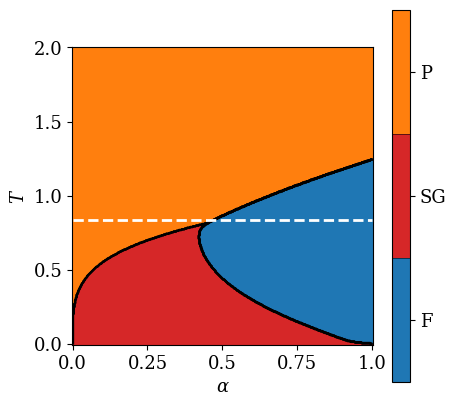

In [6]:
with open("./Data/phase_indicator_beta_s=%.2f.npy" % beta_s, "rb") as file:
    phase_diagram = np.load(file)

phase_diagram = 1 - phase_diagram / np.max(phase_diagram)
Saddle_point_iteration_P_1.plot_phase(phase_diagram, n_beta, n_alpha, alpha_range, T_range, T_ref = 1/beta_s)

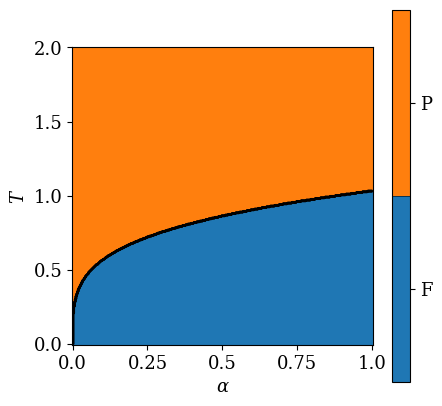

In [7]:
with open("./Data/phase_indicator_nishimori.npy", "rb") as file:
    phase_diagram = np.load(file)

phase_diagram = 1 - phase_diagram / np.max(phase_diagram)
Saddle_point_iteration_P_1.plot_phase(phase_diagram, n_beta, n_alpha, alpha_range, T_range, nishimori = True)

### Figures 2 and 3: PSB and partial PSB magnetization and overlap of the teacher-student setting with binary patterns when $c = 0$ and $P \neq P^*$.

User defined parameters

In [2]:
beta_s = 1.2
beta = 1.2

n_alpha = 20
alpha_range = np.linspace(0.1, 2, num = n_alpha, endpoint = True)

P_range = np.array([2, 3])

m_0 = 0.2
epsilon = 0

# Number of iterations and time step.
t = 100
t_step = 1
tau_step = 0.1
t_simple = 50

seed = 4

Run saddle-point equations for $c = 0$ and $P \neq P^*$ to resolve the overlap and magnetization

In [ ]:
for P in P_range:
    Saddle_point_iteration_c_0.saddle_point_run(beta, alpha_range, P, m_0, epsilon, t, t_step, tau_step, t_simple, seed)

Plotting

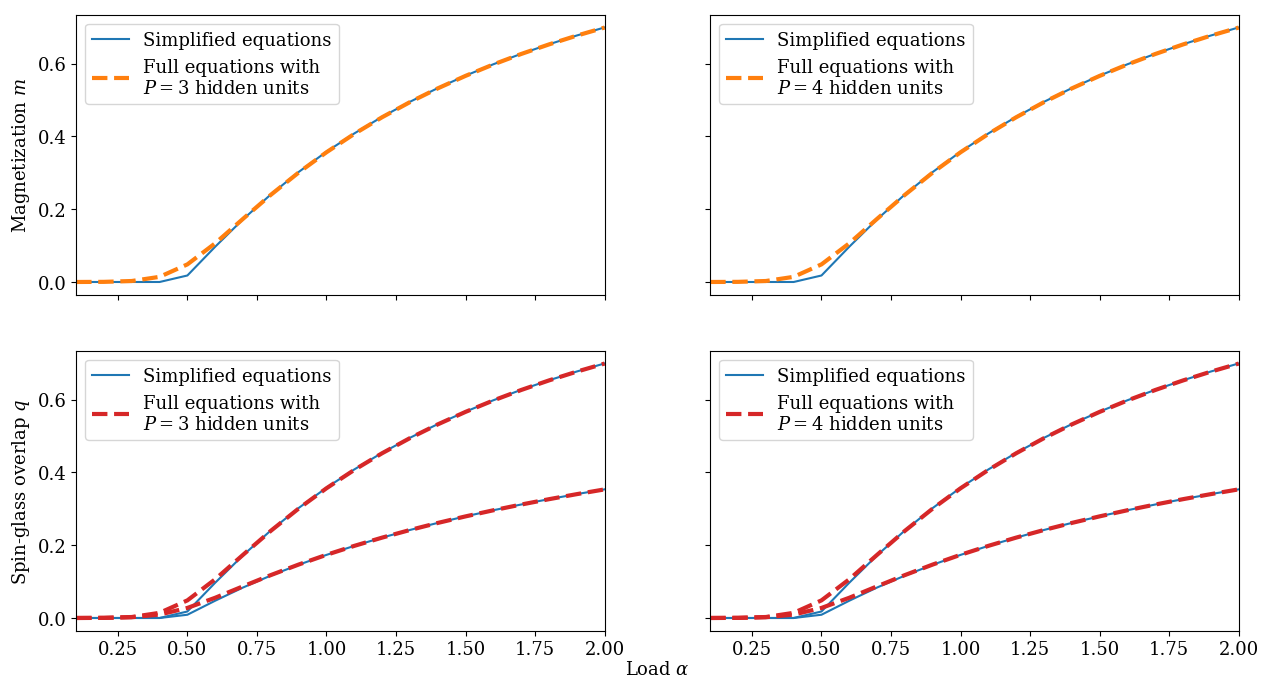

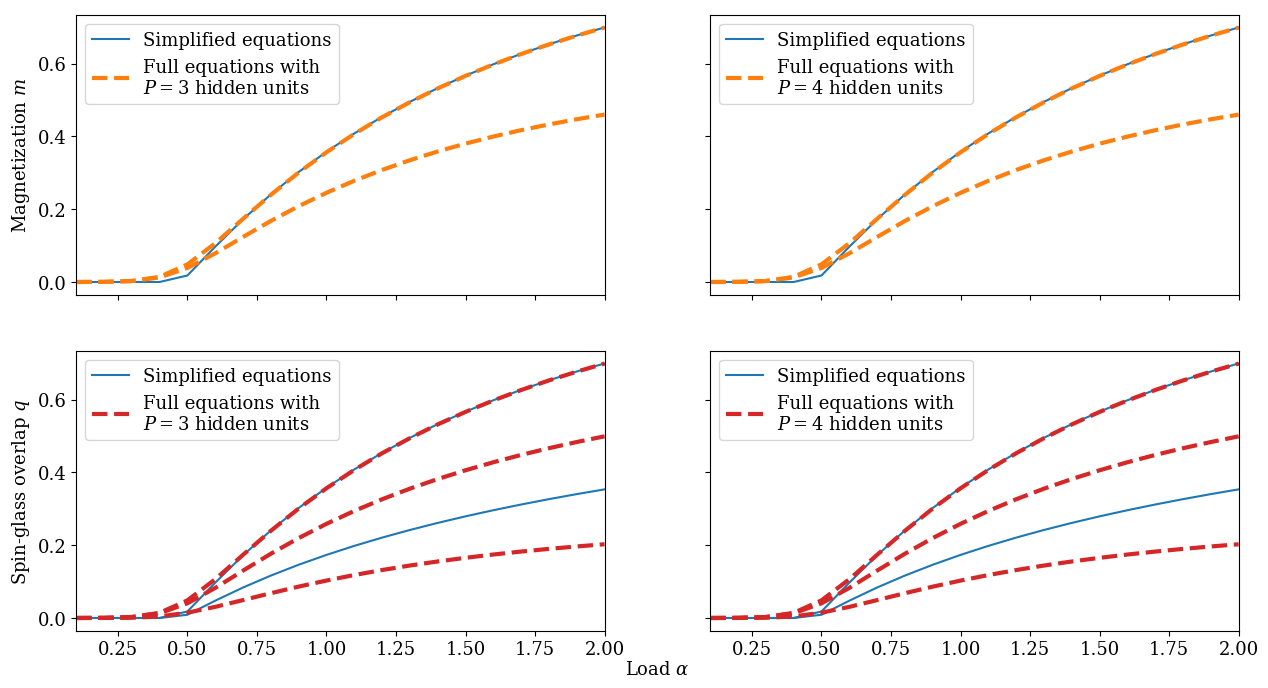

In [11]:
for name in ["PSB", "partial_PSB"]:
    Saddle_point_iteration_c_0.plot_overlap(beta, alpha_range, P_range, name)

### Figure 17: difference between the PSB and partial PSB free entropies of the teacher-student setting with binary patterns when $c = 0$ and $P \neq P^*$.

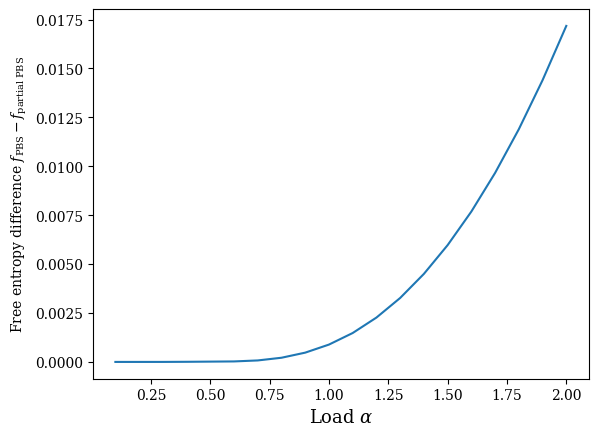

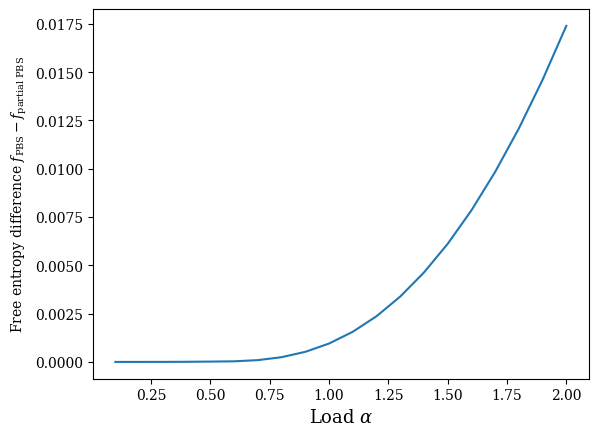

In [3]:
for P in P_range:
    Saddle_point_iteration_c_0.plot_free_entropy_difference(beta, alpha_range, P)

### Figures 18 and 19: PSB and partial PSB magnetization and overlap of the teacher-student setting with Gaussian patterns when $c = 0$ and $P \neq P^*$.

User defined parameters

In [9]:
beta = 1.2

n_alpha = 20
alpha_range = np.linspace(0.1, 2, num = n_alpha, endpoint = True)

P_range = np.array([2, 3])

m_0 = 0.2
epsilon = 0

# Number of iterations and time step.
t = 100
t_step = 1
tau_step = 0.1
t_simple = 50

seed = 4

Run saddle-point equations for $c = 0$ and $P \neq P^*$ to resolve the overlap and magnetization

In [10]:
for P in P_range:
    Saddle_point_iteration_c_0.normal_saddle_point_run(beta, alpha_range, P, m_0, epsilon, t, t_step, tau_step, t_simple, seed)

Plotting

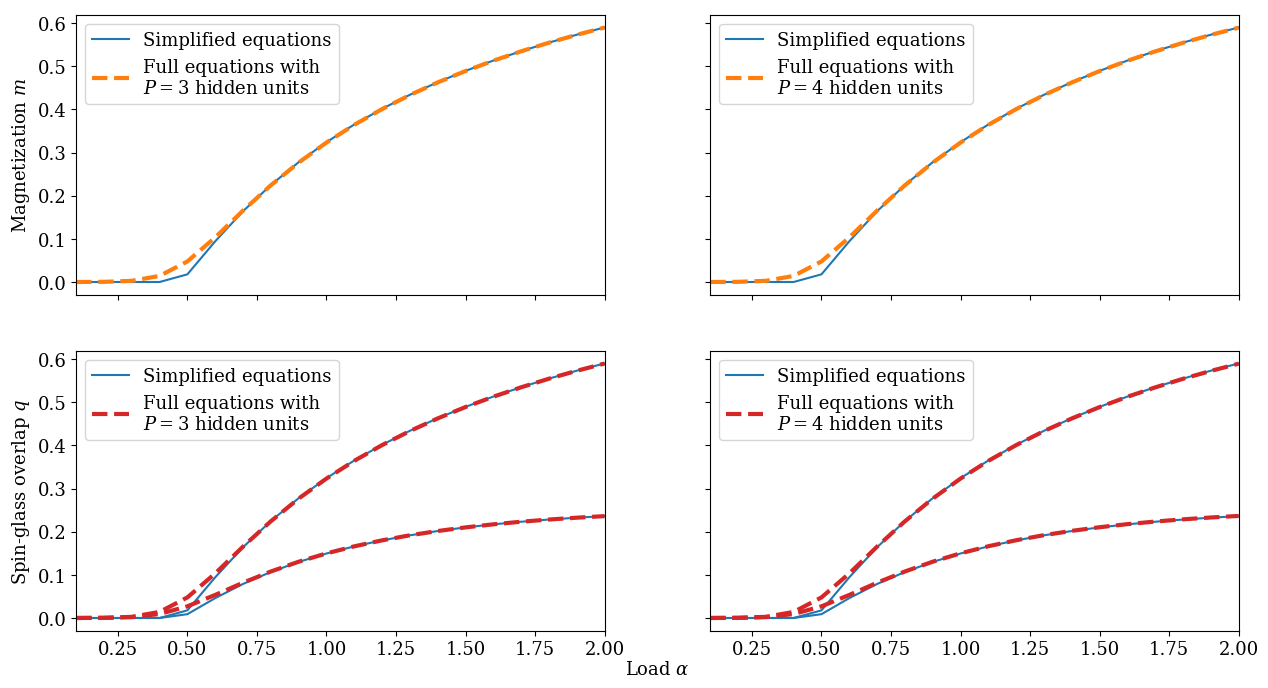

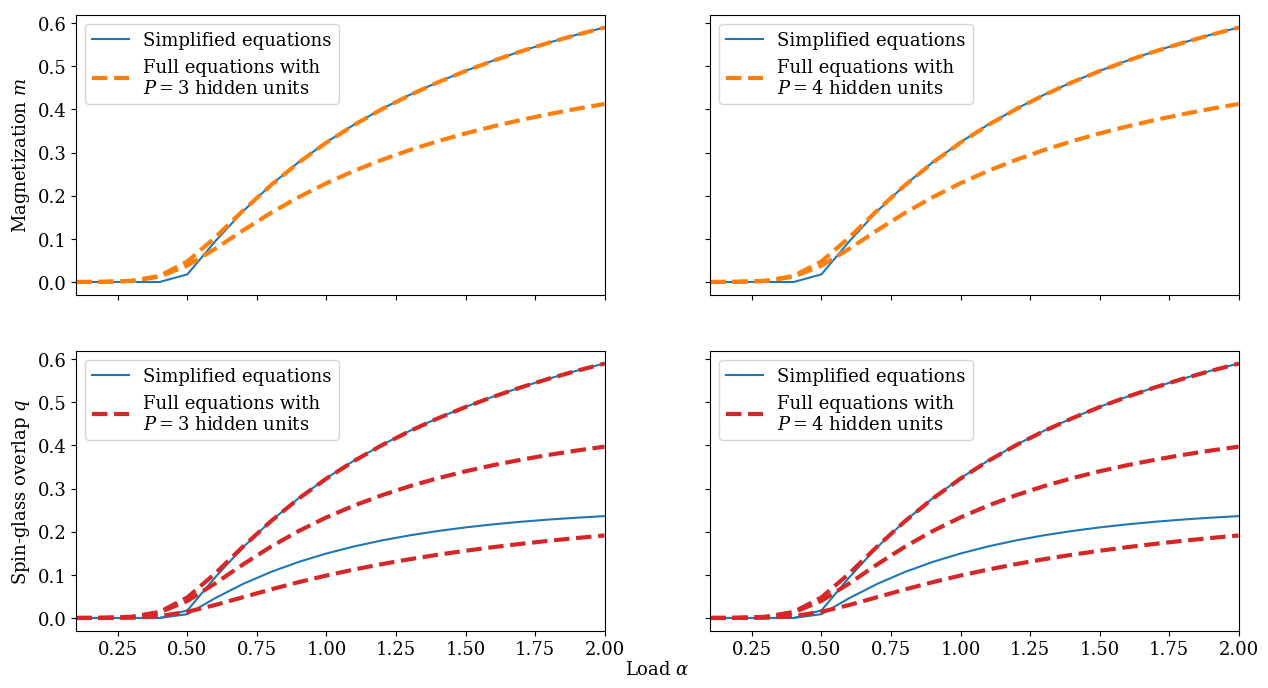

In [12]:
for name in ["PSB_normal", "partial_PSB_normal"]:
    Saddle_point_iteration_c_0.plot_overlap(beta, alpha_range, P_range, name)

### Figure 4: PSB magnetization of the teacher-student setting with binary patterns when $c = 0$ and $P = P^*$ compared against simulations.

User defined parameters

In [2]:
beta = 1.2

n_alpha = 20
alpha_range = np.linspace(0.1, 2, num = n_alpha, endpoint = True) # np.array([1.])

N = 512
P = 2
m_0 = 0.2

# It is very fast to sample from the teacher.
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 0

number_student_training_epochs = 36*12000
number_monitored_training_epochs = 5
number_burn_in_epochs = 108000
number_magnetization_samples = 500

random_number_seed = 2

random_batch_seed = 87

field_magnitude = 0.04

Monte Carlo simulation of the magnetization for $c = 0$ and $P = P^*$

In [ ]:
Simulations_c_0.simulation_run(beta, alpha_range, N, P, m_0, number_teacher_sampling_steps,
                    number_monitored_sampling_steps, number_student_training_epochs,
                    number_monitored_training_epochs, number_burn_in_epochs,
                    number_magnetization_samples, random_number_seed,
                    random_batch_seed, field_magnitude)

Plotting

Assumes that the magnetization and the overlap were already calculated using Saddle_point_iteration_c_0.saddle_point_run

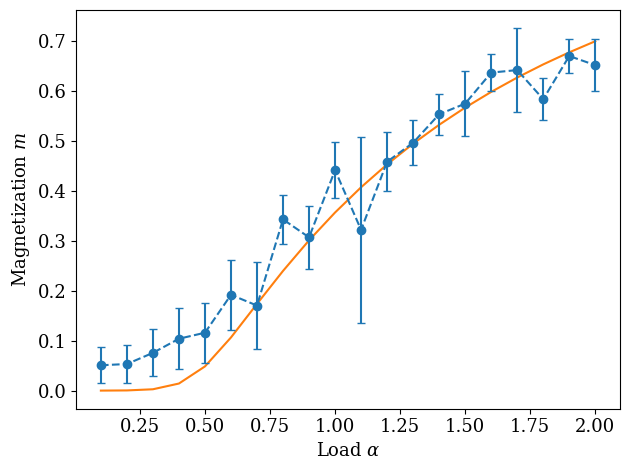

In [3]:
Simulations_c_0.plot_simulated_overlap(beta, alpha_range, P)

### Figure 5: PSB and partial PSB magnetization of the teacher-student setting with binary patterns when $c = 0$ and $P \neq P^*$ compared against simulations.

User defined parameters of the saddle-point iteration

In [4]:
beta_range = 2.8

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

P_saddle = 2

m_0 = 0.2
epsilon = 0

# Number of iterations and time step.
t = 1000
t_step = 1
tau_step = 0.1
t_simple = 50

seed = 4

Run saddle-point equations of the teacher student-setting with binary patterns for $c = 0$ and $P \neq P^*$ to resolve the magnetization

In [ ]:
Saddle_point_iteration_c_0.saddle_point_run(beta, alpha_range, P_saddle, m_0, epsilon, t, t_step, tau_step, t_simple, seed)

User defined parameters of the simulation and plotting

In [5]:
beta_range = np.array([1.2, 2.8])

n_alpha = 20
alpha_range = np.array([np.linspace(0.1, 2, num = n_alpha, endpoint = True), np.linspace(0.1, 1, num = n_alpha, endpoint = True)])

N = 512

P_sim = 1
P_s = P_sim
P = P_sim + 1
P_saddle = P

m_0 = 0.2

# It is very fast to sample from the teacher.
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 10

number_student_training_epochs = 36*12000
number_monitored_training_epochs = 20
number_burn_in_epochs = 108000
number_magnetization_samples = 1000

random_number_seed = 37

random_batch_seed = 87

field_magnitude_range = np.array([0.04, 0.])

Monte Carlo simulation of the magnetization for $c = 0$ and $P \neq P^*$

In [ ]:
for beta, alpha_subrange, field_magnitude in zip(beta_range, alpha_range, field_magnitude_range):
    Simulations_c_0_mismatched_P.simulation_run_mismatched_P(beta, alpha_subrange, N, P_s, P, m_0, number_teacher_sampling_steps,
                                number_monitored_sampling_steps, number_student_training_epochs,
                                number_monitored_training_epochs, number_burn_in_epochs,
                                number_magnetization_samples, random_number_seed,
                                random_batch_seed)

Plotting

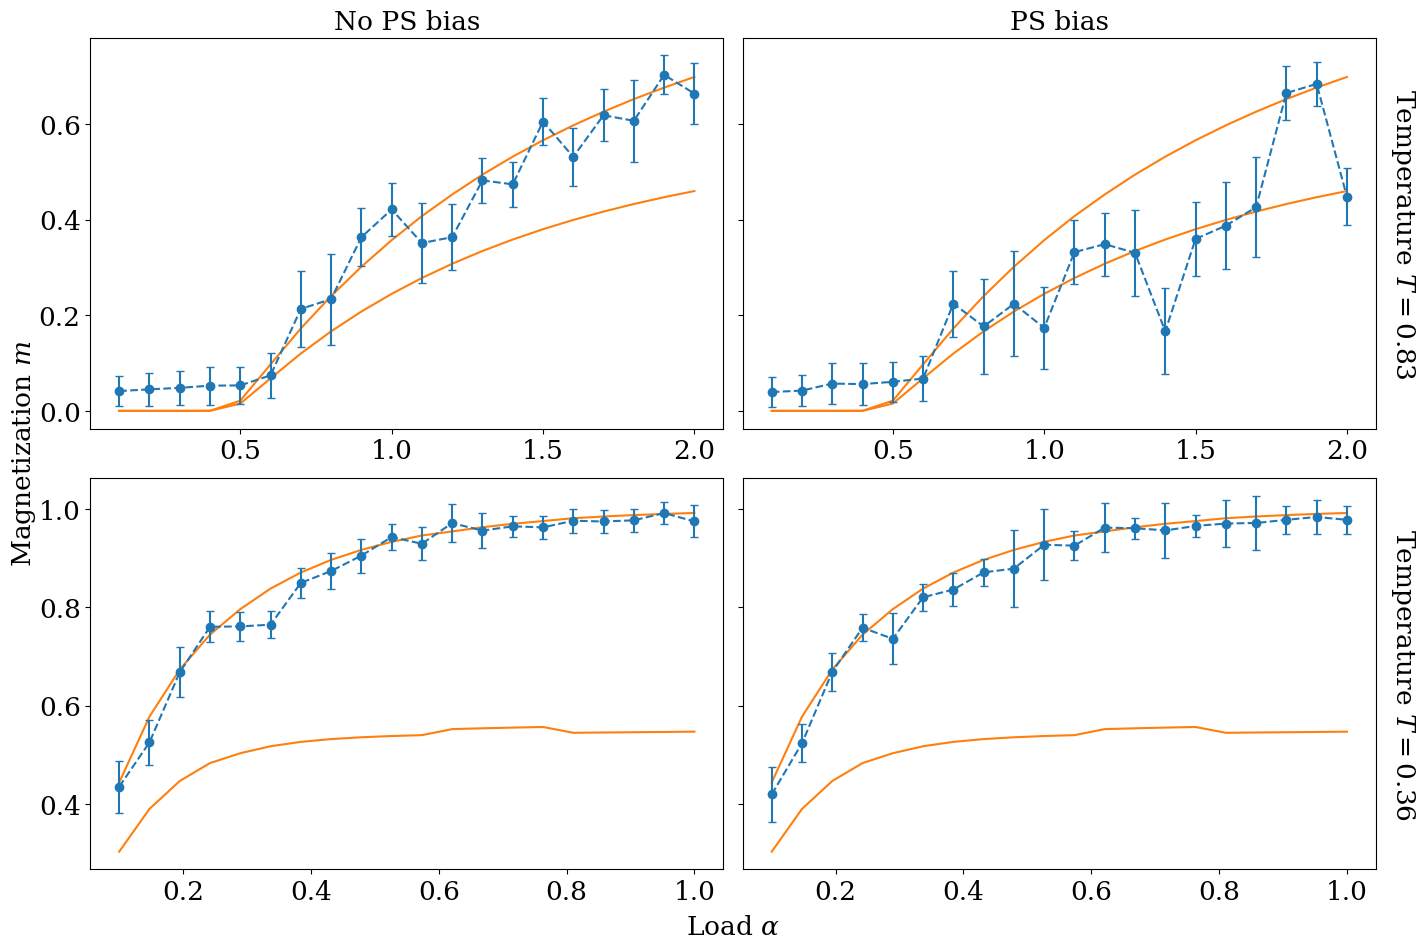

In [7]:
Simulations_c_0_mismatched_P.plot_simulated_overlap_mismatched_P(beta_range, alpha_range, P_sim, P_saddle)

### Figure 6: PSB and partial PSB magnetization of the teacher-student setting with Gaussian patterns when $c = 0$ and $P \neq P^*$ compared against simulations.

User defined parameters of the saddle-point iteration

In [17]:
beta = 4

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

P_saddle = 2

m_0 = 0.2
epsilon = 0

# Number of iterations and time step.
t = 10000
t_step = 1
tau_step = 0.1
t_simple = 50

seed = 4

Run saddle-point equations of the teacher student-setting with Gaussian patterns for $c = 0$ and $P \neq P^*$ to resolve the magnetization

In [ ]:
Saddle_point_iteration_c_0.normal_saddle_point_run(beta, alpha_range, P_saddle, m_0, epsilon, t, t_step, tau_step, t_simple, seed)

User defined parameters of the simulation and plotting

In [5]:
beta = 4

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

N = 512

P_sim = 1
P_s = P_sim
P = P_sim + 1
P_saddle = P

m_0 = 0.2

# It is very fast to sample from the teacher.
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 0

# The learning rate of student B decays more quickly than that of student A.
number_student_sampling_steps = 1
initial_learning_rate_A = 0.01
initial_learning_rate_B = 0.012
learning_rate_decay_A = 0.00005
learning_rate_decay_B = 0.005
momentum = 0.8
number_student_training_epochs = 8*7200
number_monitored_training_epochs = 5

number_burn_in_epochs = 6*7200
number_magnetization_samples = 100

random_number_seed = 2

random_batch_seed = 87

Monte Carlo simulation of the magnetization for $c = 0$ and $P \neq P^*$

In [ ]:
Simulations_c_0_mismatched_P.simulation_run_normal_mismatched_P(beta, alpha_range, N, P_s, P, m_0, number_teacher_sampling_steps,
                                       number_monitored_sampling_steps, number_student_sampling_steps,
                                       initial_learning_rate_A, initial_learning_rate_B,
                                       learning_rate_decay_A, learning_rate_decay_B,
                                       momentum, number_student_training_epochs, number_monitored_training_epochs,
                                       number_burn_in_epochs, number_magnetization_samples,
                                       random_number_seed, random_batch_seed)

Plotting

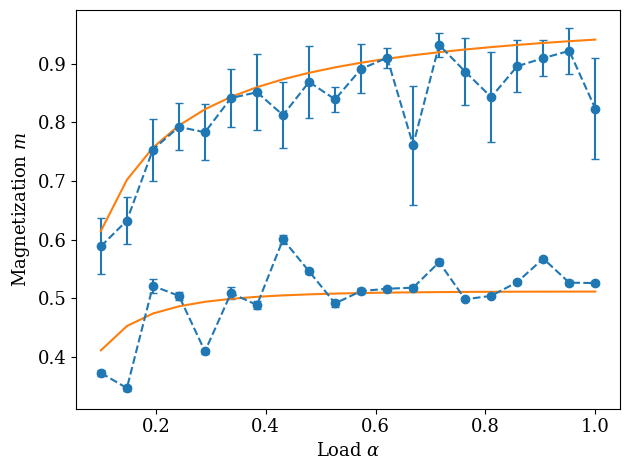

In [6]:
Simulations_c_0_mismatched_P.plot_simulated_normal_overlap_mismatched_P(beta, alpha_range, P_sim, P_saddle)

### Figure 7: Lottery ticket experiment with $c = 0$

User defined parameters of the saddle-point iteration

In [2]:
beta = 4

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

P = 2

m_0 = 0.2
epsilon = 0

# Number of iterations and time step.
t = 10000
t_step = 1
tau_step = 0.1
t_simple = 50

seed = 4

Run saddle-point equations of the teacher student-setting with Gaussian patterns for $c = 0$ to resolve the magnetization

Can be skipped if already calculated and saved using Saddle_point_iteration_c_0.normal_saddle_point_run in the section of the code pertaining to Figure 5

In [ ]:
Saddle_point_iteration_c_0.normal_saddle_point_run(beta, alpha_range, P_saddle, m_0, epsilon, t, t_step, tau_step, t_simple, seed)

User defined parameters common to the two next simulations and the plotting

In [7]:
beta = 4

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

N = 512

P_sim = 4
P_s = P_sim
P = 8
P_saddle = 2

c = None

User defined parameters of the simulation for finding the magnetization

In [3]:
# It is very fast to sample from the teacher.
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 0

# Student 0 is trained for a different number of epochs than student A and student B.
# The other parameters are shared between 0, A and B.
number_student_sampling_steps = 1
initial_learning_rate = 0.01
learning_rate_decay = 0.00005
momentum = 0.8
number_student_training_epochs = 8*8000
number_student_0_training_epochs = 4*8000
number_monitored_training_epochs = 5

number_burn_in_epochs = 8*8000-500
number_magnetization_samples = 100

random_number_seed = 2

random_batch_seed = 87

Monte Carlo simulation for finding the magnetization

In [ ]:
Lottery_ticket_run.simulation_run_winning_ticket_magnetization(beta, alpha_range, c, N, P_s, P, number_teacher_sampling_steps,
                                       number_monitored_sampling_steps, number_student_sampling_steps,
                                       initial_learning_rate, learning_rate_decay, momentum,
                                       number_student_0_training_epochs, number_student_training_epochs,
                                       number_monitored_training_epochs, number_burn_in_epochs, number_magnetization_samples,
                                       random_number_seed, random_batch_seed)

User defined parameters of the simulation for finding the lead of student B over student A

The number of student epochs is also used in the plotting function

In [5]:
# It is very fast to sample from the teacher.
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 0

# Student 0 is trained for a different number of epochs than student A and student B.
# The other parameters are shared between 0, A and B.
number_student_sampling_steps = 1
initial_learning_rate = 0.01
learning_rate_decay = 0.0005
momentum = 0.8
number_student_training_epochs = 1000
number_student_0_training_epochs = 500
number_monitored_training_epochs = 5

number_burn_in_epochs = 0
number_magnetization_samples = 500

random_number_seed = 2

random_batch_seed = 87

Monte Carlo simulation for finding the lead of student B over student A

In [ ]:
Lottery_ticket_run.simulation_run_winning_ticket_lead(beta, alpha_range, c, N, P_s, P, number_teacher_sampling_steps,
                                       number_monitored_sampling_steps, number_student_sampling_steps,
                                       initial_learning_rate, learning_rate_decay, momentum,
                                       number_student_0_training_epochs, number_student_training_epochs,
                                       number_monitored_training_epochs, number_burn_in_epochs, number_magnetization_samples,
                                       random_number_seed, random_batch_seed)

Plotting both the magnetization and the lead of student B over student A

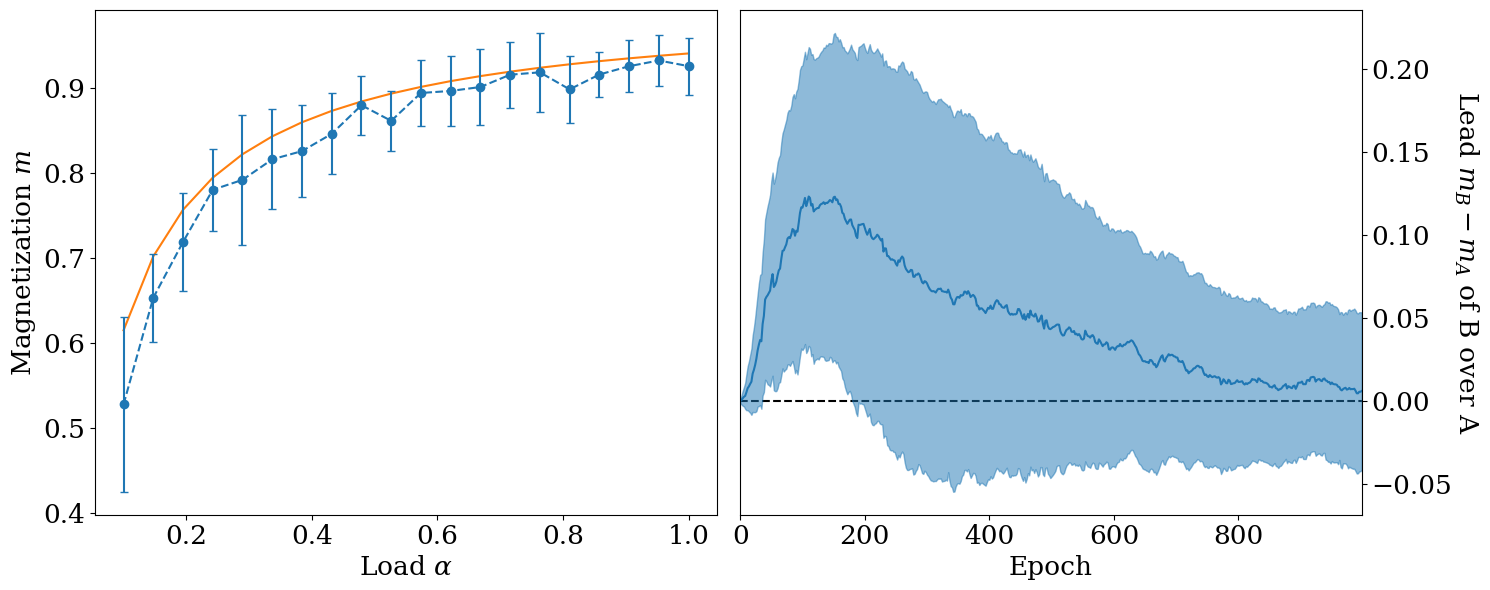

In [8]:
Lottery_ticket_run.plot_winning_ticket_lead(beta, alpha_range, P_sim, P_saddle, number_student_training_epochs, c)

### Figures 10, 16, 20 and 21: Magnetization phase diagrams for binary and Gaussian patterns with a uniform or a random correlation matrix, $\beta = \beta^*$ and $P = P^*$

User defined parameters

In [11]:
n_beta = 20
n_alpha = 20
T_range = np.linspace(1.025, 1.5, num = n_beta, endpoint = True)
alpha_range = np.linspace(0.67, 2, num = n_alpha, endpoint = True)

c_range = np.array([0.1, 0.4, 0.7])
P_range = np.array([2, 3])

# Number of iterations and time step.
t = 100
t_step = 1 # 1/2
tau_step = 0.1

seed = 4

Run saddle-point equations for $\beta = \beta^*$ and $P = P^*$ to resolve the magnetization

In [ ]:
for c in c_range:
    for P in P_range:
        Phase_diagrams.phase_diagram(T_range, alpha_range, c, P, t, t_step, tau_step, seed)

Plotting

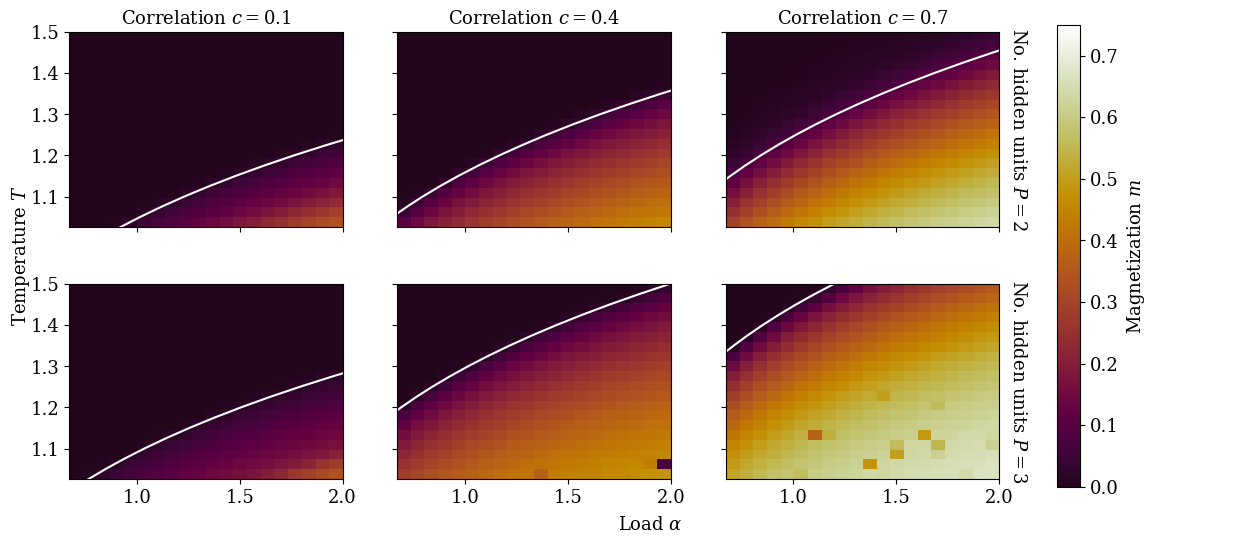

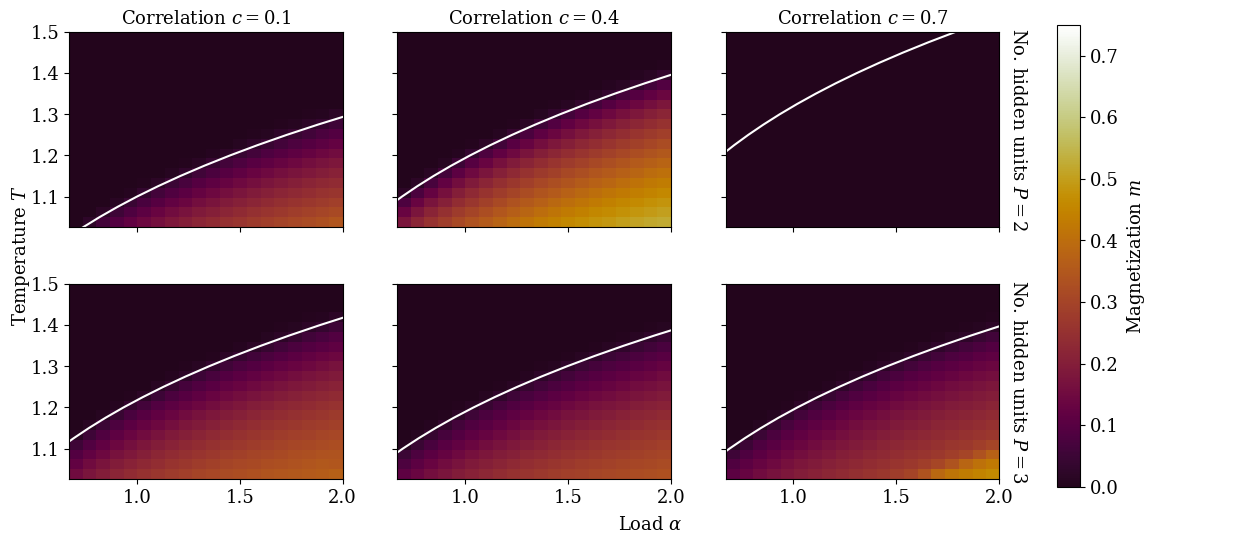

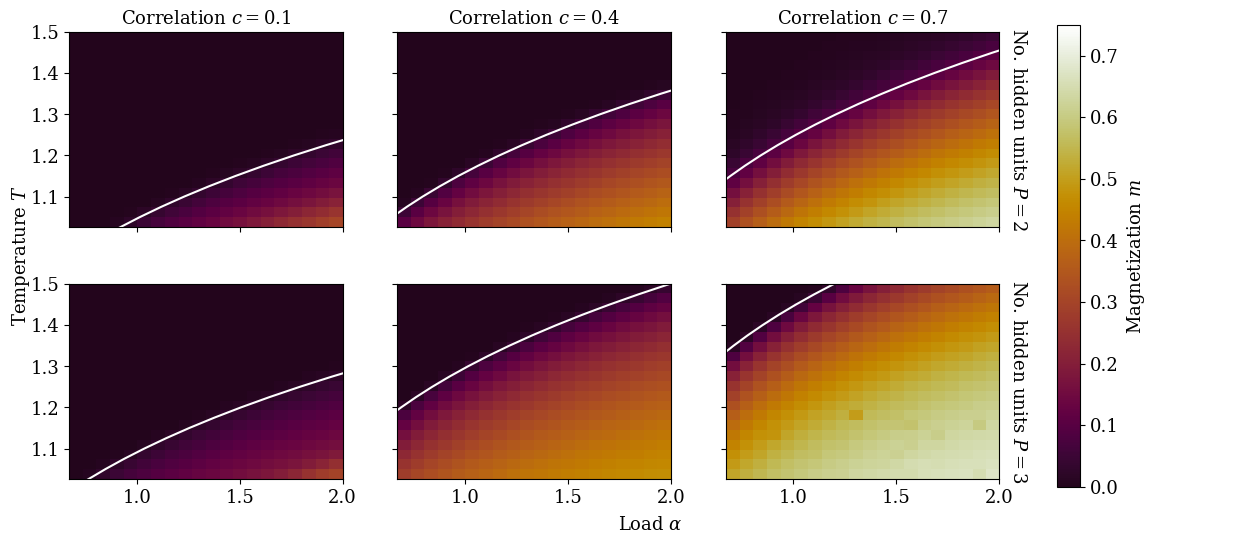

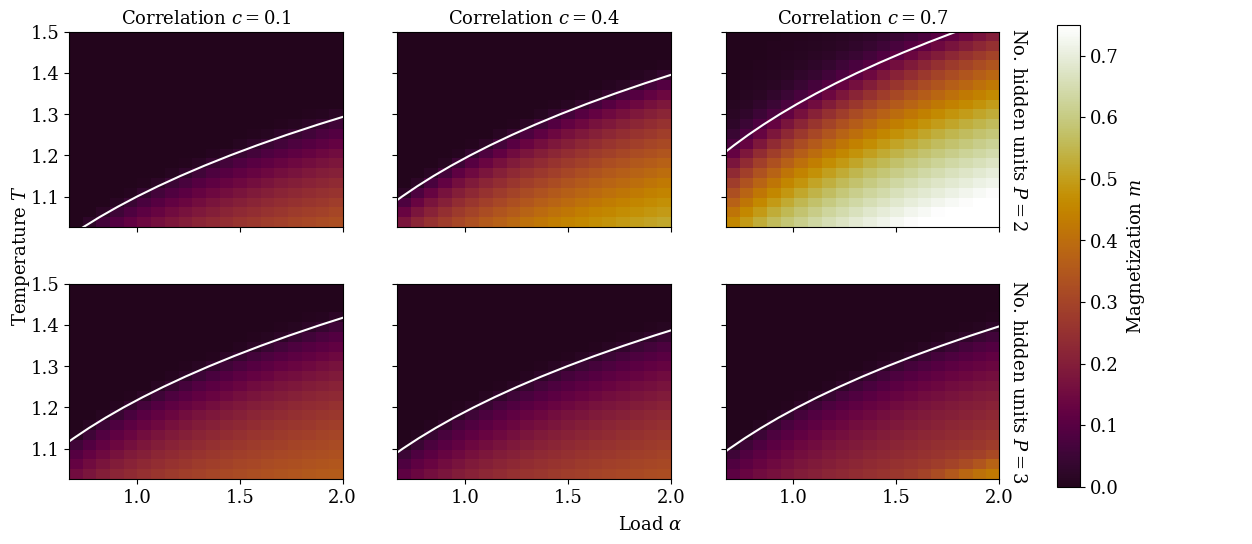

In [13]:
for name in ["binary", "binary_random", "normal", "normal_random"]:
    Phase_diagrams.plot_phase_diagram(T_range, alpha_range, c_range, P_range, name)

### Figures 11 and 12: Magnetization and overlap phase diagrams for binary patterns with a uniform correlation matrix, fixed $\beta^*$ and $P = P^*$

User defined parameters

In [2]:
beta_s = 1/1.25

n_beta = 20
n_alpha = 20
T_range = np.linspace(0.53, 1.1, num = n_beta, endpoint = True)
alpha_range = np.linspace(0.045, 0.9, num = n_alpha, endpoint = True)

c_range = np.array([0.1, 0.4, 0.7])
P_range = np.array([2, 3])

# Number of iterations and time step.
t = 100
t_step = 1 # 1/2
tau_step = 0.1

seed = 4

Run saddle-point equations for fixed $\beta^*$ and $P = P^*$ to resolve the magnetization

In [3]:
for c in c_range:
    for P in P_range:
        Phase_diagrams_fixed_T_s.phase_diagram_fixed_T_s(beta_s, T_range, alpha_range, c, P, t, t_step, tau_step, seed)

2024-10-17 11:21:18.474637: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Plotting

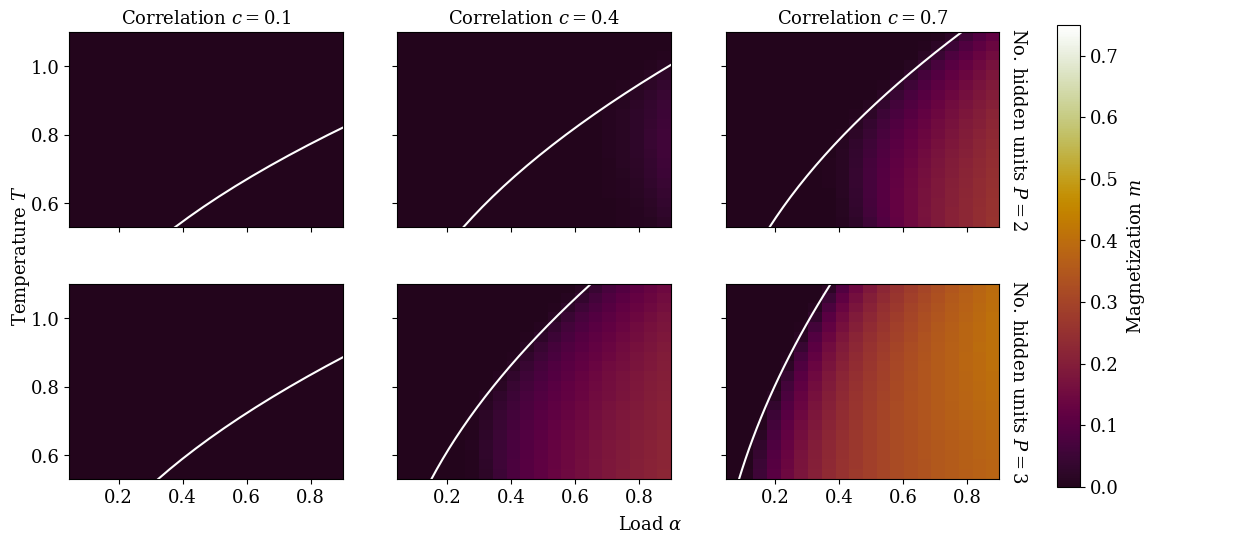

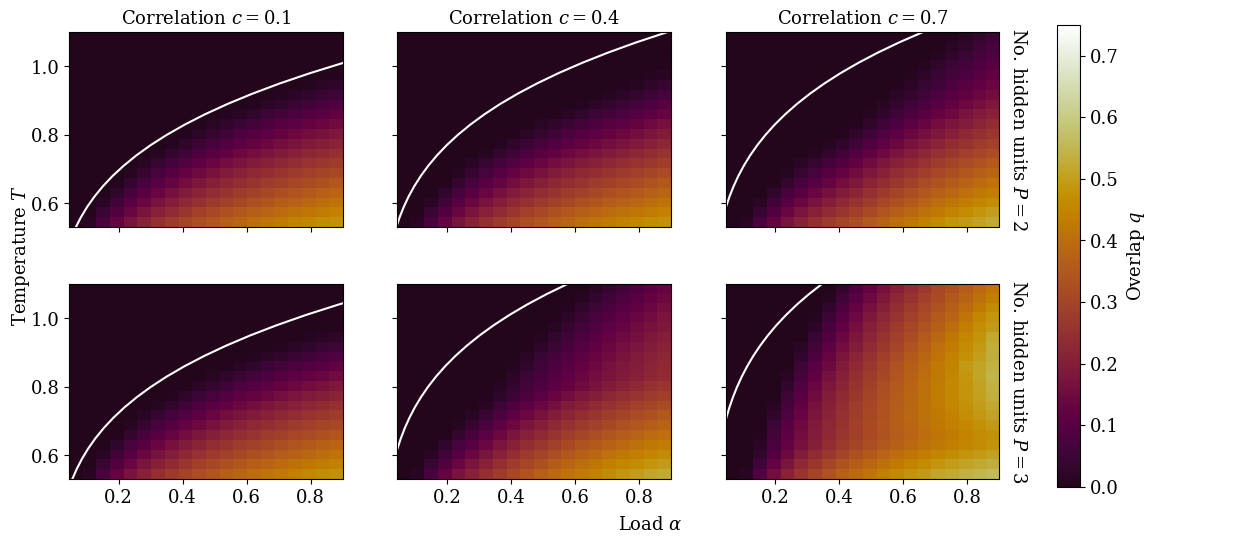

In [3]:
name = "binary"
T_s = 1/beta_s
for plot_m in [True, False]:
    Phase_diagrams_fixed_T_s.plot_phase_diagram_fixed_T_s(T_s, T_range, alpha_range, c_range, P_range, name, plot_m)

### Figure 13: magnetization of the teacher-student setting with binary patterns when $c \neq 0$, $P = 2$ and $P^* \in \left\{ 2, 3 \right\}$ compared against simulations.

User defined parameters of the saddle-point iteration

In [12]:
beta = 1

n_alpha = 20

alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

c = 0.3

P_tuple_range = [(2, 2), (2, 3)]

m_0 = 0.2
epsilon = m_0*c

# Number of iterations and time step.
t = 10000
t_step = 1
tau_step = 0.01

seed = 4

Run saddle-point equations of the teacher student-setting with binary patterns for $c \neq 0$, $P = 2$ and $P^* \in \left\{ 2, 3 \right\}$ to resolve the magnetization

In [ ]:
for P_tuple in P_tuple_range:
    P_s, P = P_tuple
    Saddle_point_iteration_c_not_0.saddle_point_run(beta, alpha_range, c, P_s, P, m_0, epsilon, t, t_step, tau_step, seed)

User defined parameters of the simulation and plotting

In [8]:
beta = 1

n_alpha = 20
alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

c = 0.3

N = 512
P_tuple_range = [(2, 2), (2, 3)]
m_0 = 0.3

# It is very fast to sample from the teacher
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 10

number_student_training_epochs = 36*12000
number_monitored_training_epochs = 5
number_burn_in_epochs = 108000
number_magnetization_samples = 500 # 1000

random_number_seed = 37

random_batch_seed = 87

Monte Carlo simulation of the magnetization for $c \neq 0$, $P = 2$ and $P^* \in \left\{ 2, 3\right\}$

In [ ]:
for P_tuple in P_tuple_range:
    P_s, P = P_tuple
    Simulations_c_not_0_mismatched_P.simulation_run_mismatched_P(beta, alpha_range, c, N, P_s, P,
                                                                 m_0, number_teacher_sampling_steps,
                    number_monitored_sampling_steps, number_student_training_epochs,
                    number_monitored_training_epochs, number_burn_in_epochs,
                    number_magnetization_samples, random_number_seed, random_batch_seed)

Step [0/100], free entropy: 0.7284
Step [10/100], free entropy: 1.4617
Step [20/100], free entropy: 1.4572
Step [30/100], free entropy: 1.3017
Step [40/100], free entropy: 1.5165
Step [50/100], free entropy: 1.4874
Step [60/100], free entropy: 1.4470
Step [70/100], free entropy: 1.2552
Step [80/100], free entropy: 1.2978
Step [90/100], free entropy: 1.4107
Step [100/100], free entropy: 1.4718
Epoch [86400/432000], log-likelihood difference: -0.1544, acceptance rate: 0.7818, magnetization sample: 0.1111
Epoch [172800/432000], log-likelihood difference: -0.1599, acceptance rate: 0.7792, magnetization sample: 0.1174
Epoch [259200/432000], log-likelihood difference: -0.1626, acceptance rate: 0.7778, magnetization sample: 0.0409
Epoch [345600/432000], log-likelihood difference: -0.1572, acceptance rate: 0.7812, magnetization sample: 0.0915
Epoch [432000/432000], log-likelihood difference: -0.1606, acceptance rate: 0.7771, magnetization sample: 0.0867
Step [0/100], free entropy: 0.7666
Step 

Plotting

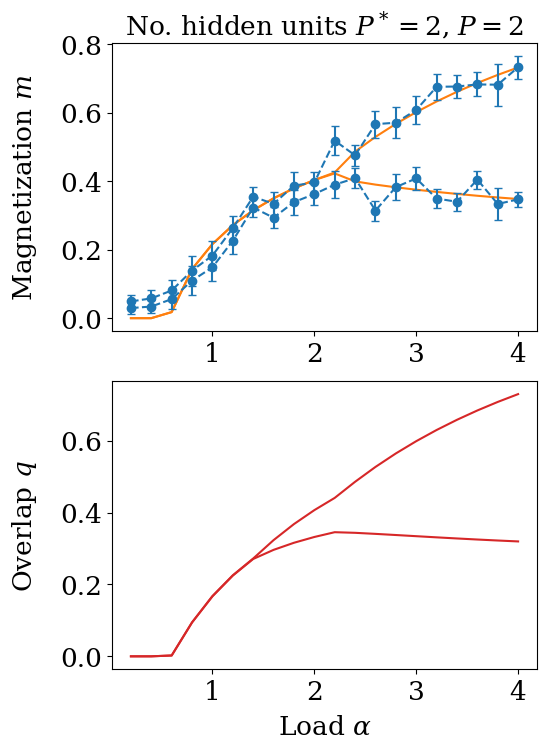

In [2]:
beta = 1

n_alpha = 20
alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

P_s = 2
P = 2
c = 0.3

Simulations_c_not_0_mismatched_P.plot_individual_overlap(beta, alpha_range, P_s, P, c)

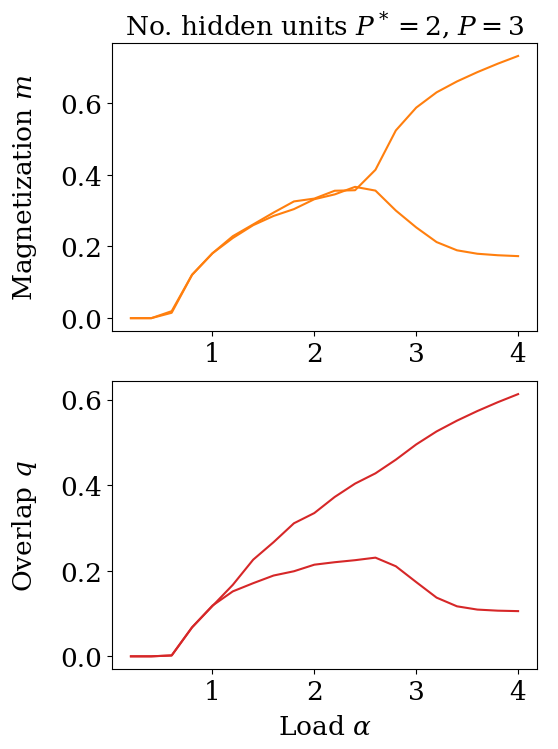

In [3]:
beta = 1

n_alpha = 20
alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

P_s = 2
P = 3
c = 0.3

Simulations_c_not_0_mismatched_P.plot_individual_overlap(beta, alpha_range, P_s, P, c)

### Figure 14: magnetization of the teacher-student setting with binary patterns when $c \in \left\{ 0.1, 0.15, 0.2 \right\}$ and $P = P^* = 3$ compared against simulations.

User defined parameters of the saddle-point iteration

In [16]:
beta = 1

n_alpha = 20

alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

c_range = np.array([0.1, 0.15, 0.2])

P_tuple = (3, 3)

m_0 = 0.2
epsilon_range = m_0*c_range

# Number of iterations and time step.
t = 10000
t_step = 1
tau_step = 0.01

seed = 4

Run saddle-point equations of the teacher student-setting with binary patterns for $c \in \left\{ 0.1, 0.15, 0.2 \right\}$ and $P = P^* = 3$ to resolve the magnetization

In [ ]:
for c, epsilon in zip(c_range, epsilon_range):
    P_s, P = P_tuple
    Saddle_point_iteration_c_not_0.saddle_point_run(beta, alpha_range, c, P_s, P, m_0, epsilon, t, t_step, tau_step, seed)

User defined parameters of the simulation and plotting

In [8]:
beta = 1

n_alpha = 20
alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

c_range = np.array([0.1, 0.15, 0.2])

N = 512
P_tuple = (3, 3)
m_0 = 0.3

# It is very fast to sample from the teacher
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 10

number_student_training_epochs = 36*12000
number_monitored_training_epochs = 5
number_burn_in_epochs = 108000
number_magnetization_samples = 500 # 1000

random_number_seed = 37

random_batch_seed = 87

Monte Carlo simulation of the magnetization for $c \in \left\{ 0.1, 0.15, 0.2 \right\}$ and $P = P^* = 3$

In [ ]:
for c in c_range:
    P_s, P = P_tuple
    Simulations_c_not_0_mismatched_P.simulation_run_mismatched_P(beta, alpha_range, c, N, P_s, P,
                                                                 m_0, number_teacher_sampling_steps,
                    number_monitored_sampling_steps, number_student_training_epochs,
                    number_monitored_training_epochs, number_burn_in_epochs,
                    number_magnetization_samples, random_number_seed, random_batch_seed)

Step [0/100], free entropy: 0.7284
Step [10/100], free entropy: 1.4617
Step [20/100], free entropy: 1.4572
Step [30/100], free entropy: 1.3017
Step [40/100], free entropy: 1.5165
Step [50/100], free entropy: 1.4874
Step [60/100], free entropy: 1.4470
Step [70/100], free entropy: 1.2552
Step [80/100], free entropy: 1.2978
Step [90/100], free entropy: 1.4107
Step [100/100], free entropy: 1.4718
Epoch [86400/432000], log-likelihood difference: -0.1544, acceptance rate: 0.7818, magnetization sample: 0.1111
Epoch [172800/432000], log-likelihood difference: -0.1599, acceptance rate: 0.7792, magnetization sample: 0.1174
Epoch [259200/432000], log-likelihood difference: -0.1626, acceptance rate: 0.7778, magnetization sample: 0.0409
Epoch [345600/432000], log-likelihood difference: -0.1572, acceptance rate: 0.7812, magnetization sample: 0.0915
Epoch [432000/432000], log-likelihood difference: -0.1606, acceptance rate: 0.7771, magnetization sample: 0.0867
Step [0/100], free entropy: 0.7666
Step 

Plotting

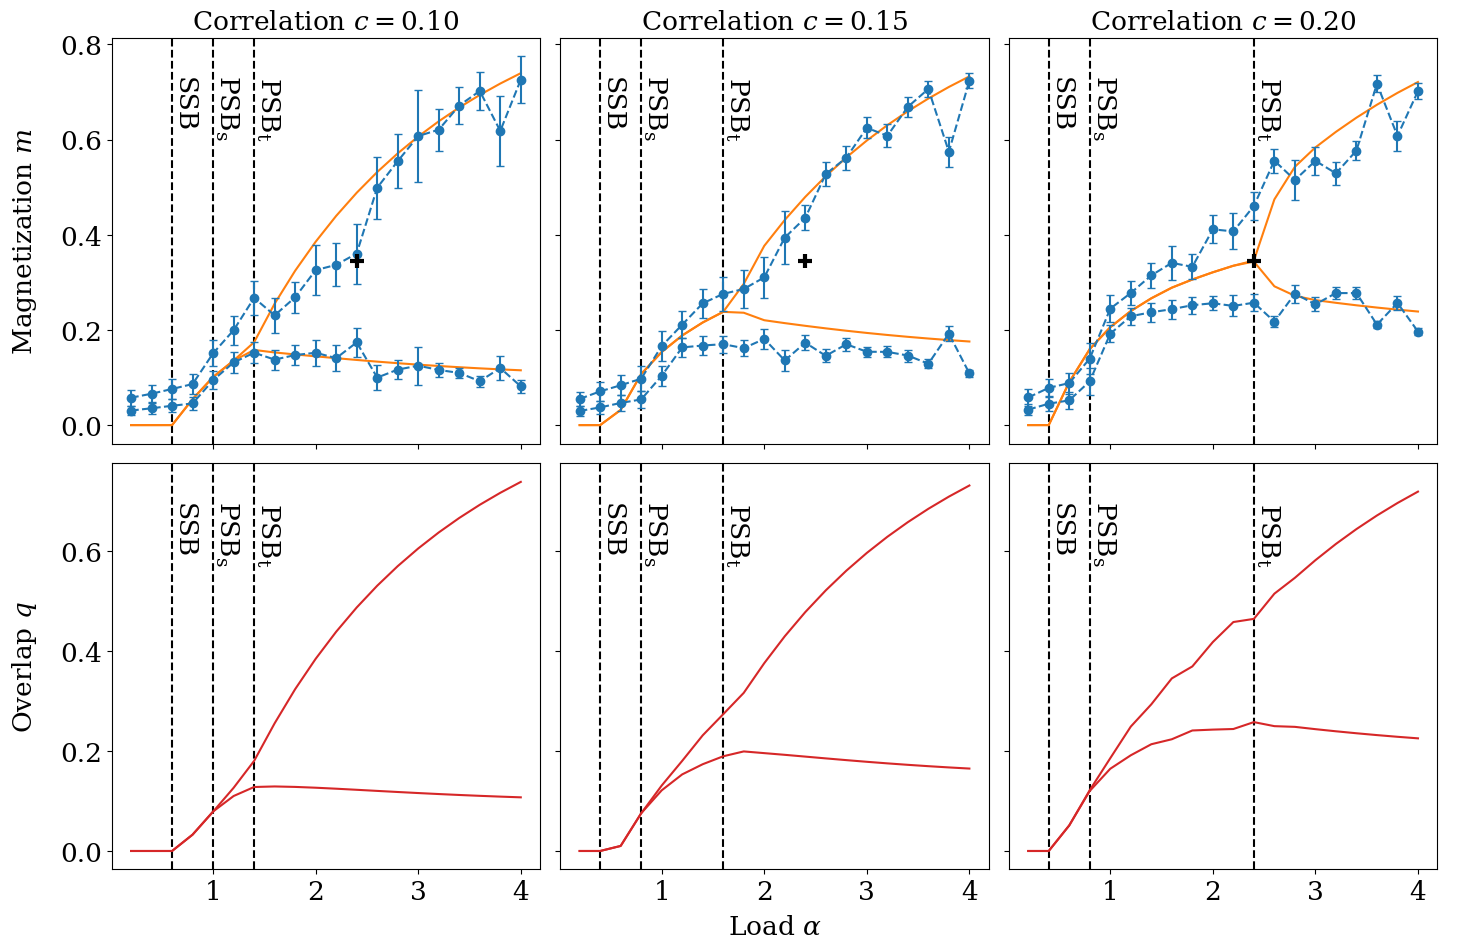

In [4]:
beta = 1

n_alpha = 20
alpha_range = np.linspace(0.2, 4, num = n_alpha, endpoint = True)

P_tuple_range = [(3, 3), (3, 3), (3, 3)]
c_range = [0.1, 0.15, 0.2]

Simulations_c_not_0_mismatched_P.plot_simulated_overlap(beta, alpha_range, P_tuple_range, c_range)

### Figure 15: Lottery ticket experiment with $c \neq 0$

User defined parameters of the saddle-point iteration

In [2]:
beta = 2.8

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

c = 0.05

P_s = 4
P = 4

m_0 = 0.2
epsilon = m_0*c

t = 10000
t_step = 1
tau_step = 0.1

seed = 4

Run saddle-point equations of the teacher student-setting with Gaussian patterns for $c \neq 0$ to resolve the magnetization

In [ ]:
Saddle_point_iteration_c_not_0.saddle_point_run(beta, alpha_range, c, P_s, P, m_0, epsilon, t, t_step, tau_step, seed)

Max residuals of m, s and q, respectively:
Max residuals of m_hat, s_hat and q_hat, respectively:
0.511134922504425
0.002167940139770508
1.1733002662658691
9.807129859924316
0.21264784038066864
0.002193272113800049
Max residuals of m, s and q, respectively:
Max residuals of m_hat, s_hat and q_hat, respectively:
0.04896147549152374
0.0006792545318603516
6.180381774902344
1.1565077304840088
0.26046866178512573
0.0006755664944648743
Max residuals of m, s and q, respectively:
Max residuals of m_hat, s_hat and q_hat, respectively:
0.013447538018226624
0.0004919767379760742
6.714364528656006
0.23943042755126953
0.049263253808021545
0.0012725591659545898
Max residuals of m, s and q, respectively:
Max residuals of m_hat, s_hat and q_hat, respectively:
0.013979002833366394
0.0009715557098388672
1.1743810176849365
0.059340596199035645
0.015030540525913239
0.0017201900482177734
Max residuals of m, s and q, respectively:
Max residuals of m_hat, s_hat and q_hat, respectively:
0.011932551860809326
0

User defined parameters common to the two next simulations

In [2]:
beta = 2.8

n_alpha = 20
alpha_range = np.linspace(0.1, 1, num = n_alpha, endpoint = True)

N = 512

P_sim = 4
P_s = P_sim
P = 8
P_saddle = P_s

c = 0.05

User defined parameters of the simulation for finding the magnetization

In [6]:
# It is very fast to sample from the teacher
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 0

# Student 0 is trained for a different number of epochs than student A and student B.
# The other parameters are shared between 0, A and B.
number_student_sampling_steps = 1
initial_learning_rate = 0.01
learning_rate_decay = 0.00005
momentum = 0.8
number_student_training_epochs = 8*8000
number_student_0_training_epochs = 2000
number_monitored_training_epochs = 5

number_burn_in_epochs = 8*8000-500
number_magnetization_samples = 100

random_number_seed = 6923 # 2

random_batch_seed = 879684 # 87

Monte Carlo simulation for finding the magnetization

In [7]:
Lottery_ticket_run.simulation_run_winning_ticket_magnetization(beta, alpha_range, c, N, P_s, P, number_teacher_sampling_steps,
                                       number_monitored_sampling_steps, number_student_sampling_steps,
                                       initial_learning_rate, learning_rate_decay, momentum,
                                       number_student_0_training_epochs, number_student_training_epochs,
                                       number_monitored_training_epochs, number_burn_in_epochs, number_magnetization_samples,
                                       random_number_seed, random_batch_seed)

Epoch [12800/64000], loss: -2.8996, reconstruction error: 1455.6031, Magnetization sample: 0.3624
Epoch [25600/64000], loss: -0.4030, reconstruction error: 1290.8458, Magnetization sample: 0.3218
Epoch [38400/64000], loss: 2.2353, reconstruction error: 1487.0996, Magnetization sample: 0.3372
Epoch [51200/64000], loss: -3.1242, reconstruction error: 1418.6924, Magnetization sample: 0.3229
Epoch [64000/64000], loss: -4.1907, reconstruction error: 1424.4054, Magnetization sample: 0.3347
Epoch [400/2000], loss: 7.7337, reconstruction error: 2552.9812, Magnetization sample: 0.1909
Epoch [800/2000], loss: 0.7587, reconstruction error: 2599.7014, Magnetization sample: 0.2588
Epoch [1200/2000], loss: -1.9695, reconstruction error: 2574.0630, Magnetization sample: 0.2932
Epoch [1600/2000], loss: 7.4001, reconstruction error: 2564.9236, Magnetization sample: 0.3164
Epoch [2000/2000], loss: -1.3997, reconstruction error: 2571.3237, Magnetization sample: 0.3402
Epoch [12800/64000], loss: -0.7963, 

User defined parameters of the simulation for finding the lead of student B over student A

The number of student epochs is also used in the plotting function

In [8]:
# It is very fast to sample from the teacher
number_teacher_sampling_steps = 100
number_monitored_sampling_steps = 0

# Student 0 can be trained for a different number of epochs than student A and student B.
# The other parameters are shared between 0, A and B.
number_student_sampling_steps = 1
initial_learning_rate = 0.01
learning_rate_decay = 0.00005
momentum = 0.8
number_student_training_epochs = 2000
number_student_0_training_epochs = 2000
number_monitored_training_epochs = 5

number_burn_in_epochs = 0
number_magnetization_samples = 500

random_number_seed = 6923 # 2

random_batch_seed = 879684 # 87

Monte Carlo simulation for finding the lead of student B over student A

In [9]:
Lottery_ticket_run.simulation_run_winning_ticket_lead(beta, alpha_range, c, N, P_s, P, number_teacher_sampling_steps,
                                       number_monitored_sampling_steps, number_student_sampling_steps,
                                       initial_learning_rate, learning_rate_decay, momentum,
                                       number_student_0_training_epochs, number_student_training_epochs,
                                       number_monitored_training_epochs, number_burn_in_epochs, number_magnetization_samples,
                                       random_number_seed, random_batch_seed)

Epoch [400/2000], loss: 4.2507, reconstruction error: 1480.9685, Magnetization sample: 0.1574
Epoch [800/2000], loss: 5.1708, reconstruction error: 1442.1119, Magnetization sample: 0.2935
Epoch [1200/2000], loss: 0.9241, reconstruction error: 1430.8992, Magnetization sample: 0.2744
Epoch [1600/2000], loss: -3.5121, reconstruction error: 1402.7690, Magnetization sample: 0.2973
Epoch [2000/2000], loss: 2.3920, reconstruction error: 1438.3188, Magnetization sample: 0.3449
Epoch [400/2000], loss: 7.8350, reconstruction error: 2778.4365, Magnetization sample: 0.1563
Epoch [800/2000], loss: -2.1284, reconstruction error: 2681.3611, Magnetization sample: 0.2671
Epoch [1200/2000], loss: 6.7828, reconstruction error: 2723.0122, Magnetization sample: 0.2805
Epoch [1600/2000], loss: 0.3111, reconstruction error: 2813.6575, Magnetization sample: 0.2405
Epoch [2000/2000], loss: -3.0103, reconstruction error: 2759.6843, Magnetization sample: 0.2529
Epoch [400/2000], loss: -1.0194, reconstruction err

Plotting both the magnetization and the lead of student B over student A

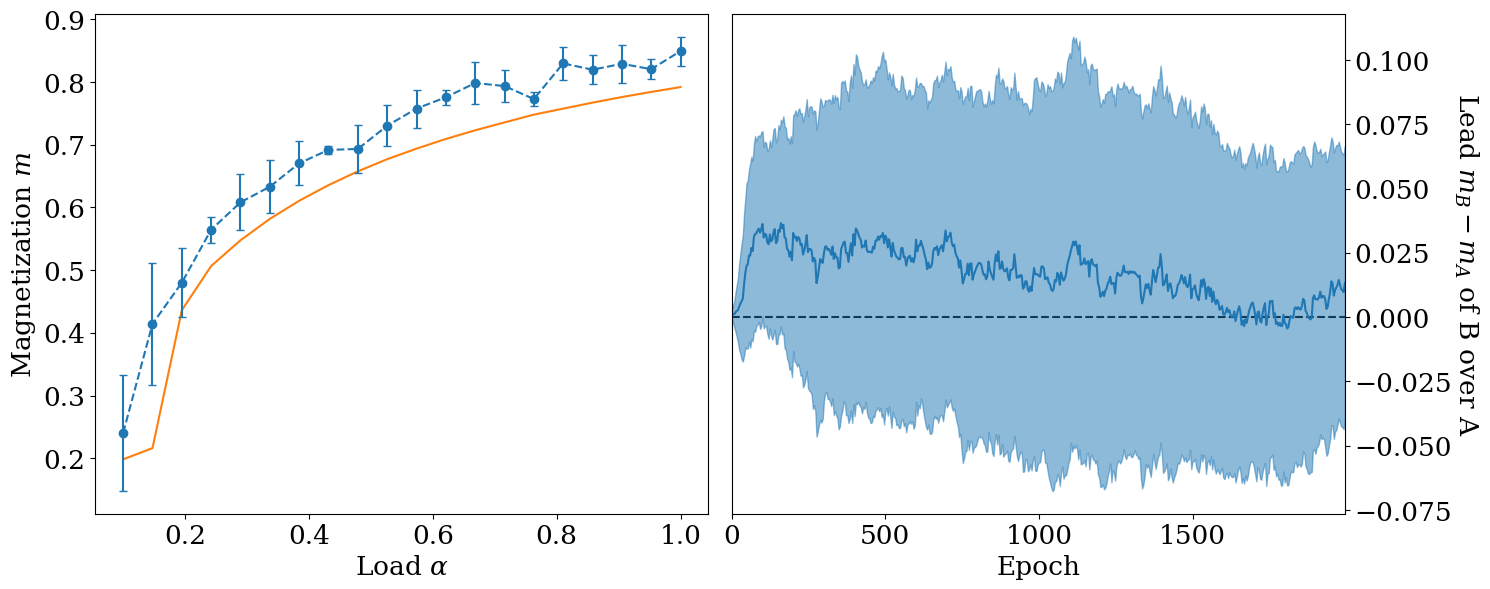

In [10]:
Lottery_ticket_run.plot_winning_ticket_lead(beta, alpha_range, P_sim, P_saddle, number_student_training_epochs, c)

### Figure 8 and 9: Critical load of the teacher-student setting when $\beta = \beta^*$ and $P = P^*$ for both uniform and random correlations in the teacher patterns

User defined parameters

In [13]:
n_beta = 400
n_c = 400

# Parameter ranges for uniform correlations.
T_equi_range = np.linspace(0.0025, 1, num = n_beta, endpoint = True)
beta_s_equi_range = 1/T_equi_range[:, np.newaxis, np.newaxis, np.newaxis]
c_equi_range = np.linspace(0, 0.95, num = n_c, endpoint = True)

n_beta = 20
n_c = 20

# Parameter ranges for random correlations.
T_rand_range = np.linspace(0.0025, 1, num = n_beta, endpoint = True)
beta_s_rand_range = 1/T_rand_range[:, np.newaxis, np.newaxis, np.newaxis]
c_rand_range = np.linspace(0, 0.95, num = n_c, endpoint = True)

P_range = np.array([2, 4, 6])

Compute the inverse eigenvalues of the matrix S defined in Appendix F of the paper in order to find the critical load

In [14]:
for P in P_range:
    Critical_load.inv_eigval(beta_s_equi_range, c_equi_range, P)
    Critical_load.random_inv_eigval(beta_s_rand_range, c_rand_range, P, t, seed)

Plotting

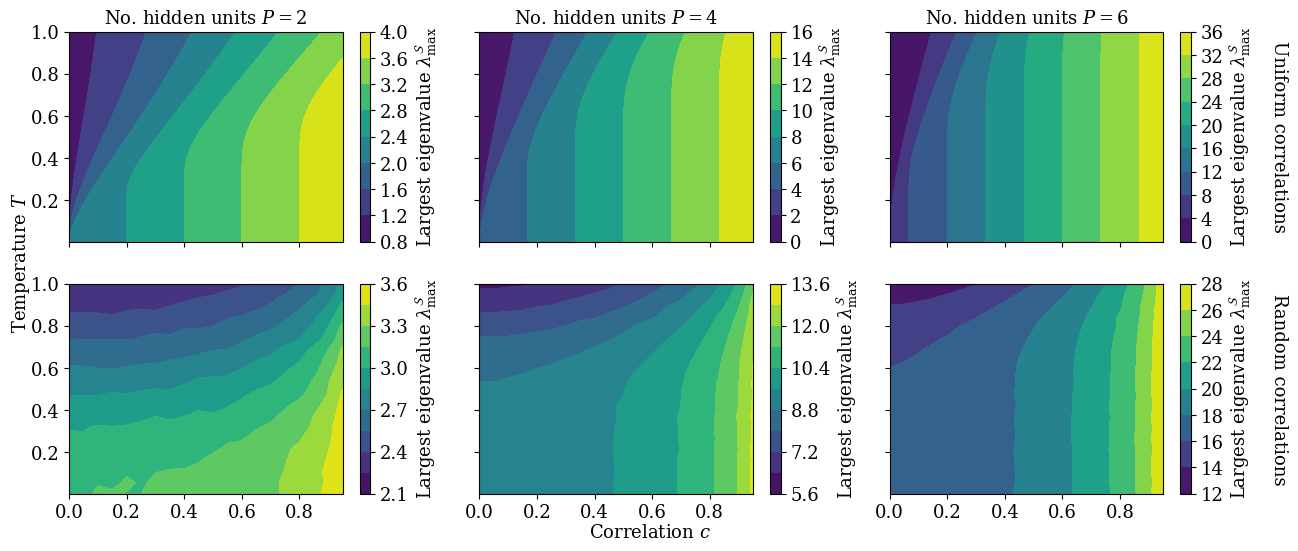

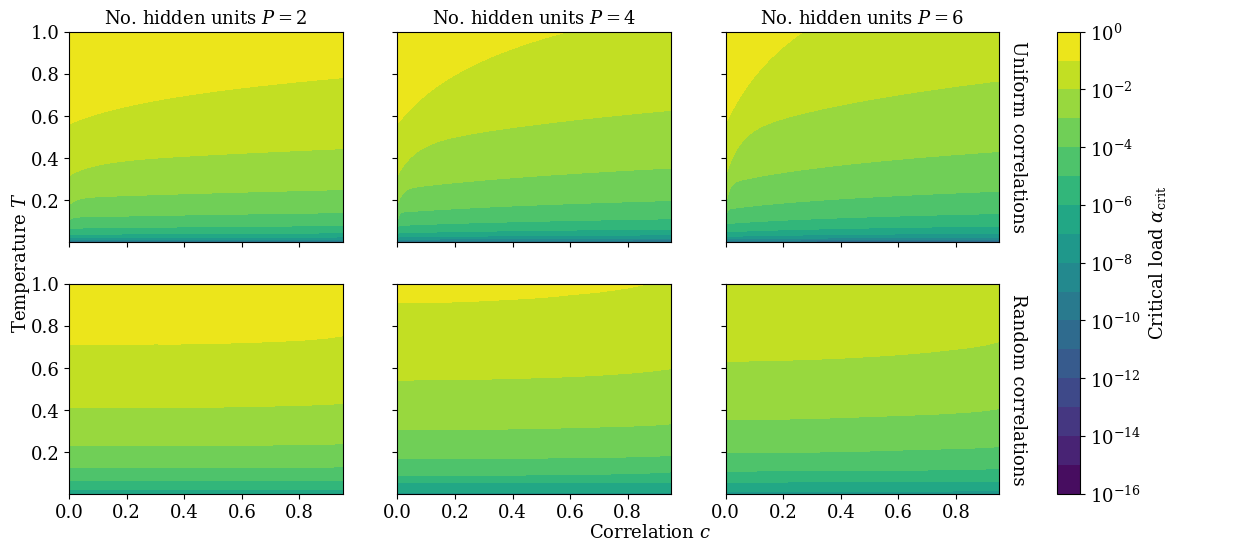

In [15]:
c_range_list = [c_equi_range, c_rand_range]
T_range_list = [T_equi_range, T_rand_range]

Critical_load.plot_inv_eigval(T_range_list, c_range_list, P_range)
Critical_load.plot_critical_load(T_range_list, c_range_list, P_range)